# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with the RDKit

## Similarities

According to the Descriptors we now can investigate our data set according to similarities. Therefore, we choose testosterone (which is part of the data set) as molecule of comparison. We again need to load the submodule to determine descriptors.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem, Draw
from rdkit import DataStructs
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole

from hints import hint

## Exercise 1

Load the 'drug.smi' file and perform a name search. 
- How many and which molecules do you find with the name 'testosterone' in them? 
- Vizualize them.

In [11]:
# hint('comm1.1')
# hint('comm1.2')
# hint('comm1.3')

n_testosterone = 0
drugs = pd.read_csv('drugs.smi')
drugs['images'] = drugs['smiles'].apply(Chem.MolFromSmiles)
drugs['hasTest'] = drugs['name'].apply(lambda s: s.lower().find("testosterone"))
for i in range(len(drugs)):
    if drugs['hasTest'][i] > -1:
        n_testosterone += 1
    else:
        None
print(n_testosterone)

13


In [12]:
assert isinstance(n_testosterone, int)
assert n_testosterone > 2  # did you only include exact matches?
assert n_testosterone != 5  # have you considered lower/upper case?

## Exercise 2

1) Calculate the Morgan fingerprints and two different metrics: 
    - tanimoto
    - dice

In [49]:
testoSmile = "CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C"
testo = Chem.MolFromSmiles(testoSmile)
testoPrt = SimilarityMaps.GetMorganFingerprint(testo)
drugs['morgan'] = drugs['images'].apply(SimilarityMaps.GetMorganFingerprint)
drugs['similarToTestoTanimoto'] = drugs['morgan'].apply(lambda mol: DataStructs.FingerprintSimilarity(mol,testoPrt, metric=DataStructs.TanimotoSimilarity))
#DataStructs.FingerprintSimilarity(drugs['morgan'][0],drugs['morgan'][1], metric=DataStructs.TanimotoSimilarity)
#DataStructs.FingerprintSimilarity(drugs['morgan'][0],drugs['morgan'][1])
drugs['similarToTestoDice'] = drugs['morgan'].apply(lambda mol: DataStructs.FingerprintSimilarity(mol,testoPrt, metric=DataStructs.DiceSimilarity))

,Unnamed: 0,name,smiles,images,hasTest,morgan,similarToTestoTanimoto,similarToTestoDice
0,0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f85e01218f0>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.073529,0.136986
1,1,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f85e0121800>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090278,0.165605
2,2,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x7f85e0121850>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.047619,0.090909
3,3,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7f85e0121940>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.088710,0.162963
4,4,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f85e01217b0>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.074627,0.138889
...,...,...,...,...,...,...,...,...
9075,9075,Magnesium acetate,[Mg++].CC([O-])=O.CC([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7f85e01012b0>,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.066667,0.125000
9076,9076,Baloxavir marboxil,[H][C@@]12COCCN1C(=O)C1=C(OCOC(=O)OC)C(=O)C=CN...,<rdkit.Chem.rdchem.Mol object at 0x7f85e0101300>,-1,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.083333,0.153846
9077,9077,Tetraglyme,COCCOCCOCCOCCOC,<rdkit.Chem.rdchem.Mol object at 0x7f85e0101350>,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.041667,0.080000
9078,9078,alpha-Tocopherol succinate,[H][C@@](C)(CCCC(C)C)CCC[C@@]([H])(C)CCC[C@]1(...,<rdkit.Chem.rdchem.Mol object at 0x7f85e01013a0>,-1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.121951,0.217391


In [30]:
#_a# = (1)
#_#b = (1,)
#type(_a), type(_b), len(_b)

In [19]:
#a = list(range(5))

In [28]:
#b, *c, d, e, f, g= a

In [29]:
#for key, *val in dictionary_name.items()

[]

2) Compare the results as a visualization.

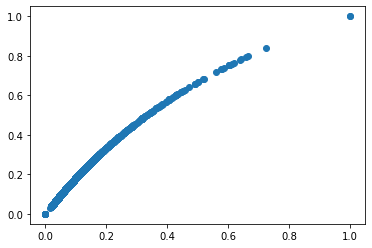

In [52]:
plt.scatter(drugs['similarToTestoTanimoto'], drugs['similarToTestoDice'])

In [109]:
sortedByTani = drugs.sort_values(by='similarToTestoTanimoto', ascending=False)
sortedByDice = drugs.sort_values(by='similarToTestoDice', ascending=False)
#sortedByDice
#sortedByTani['name'].iloc[0]
for i in range(len(sortedByTani)):
    if sortedByTani['hasTest'][i] > -1:
        print("Tani:" + drugs['name'][i] + "at" + str(i))
    else:
        None

for i in range(len(sortedByDice)):
    if sortedByDice['hasTest'][i] > -1:
        print("Dice:" + drugs['name'][i])
    else:
        None

Tani:Testosteroneat509
Tani:Testosterone propionateat1226
Tani:1-Testosteroneat1283
Tani:4-Hydroxytestosteroneat1287
Tani:18-methyl-19-nortestosteroneat1338
Tani:Methyl-1-testosteroneat1367
Tani:Methyltestosteroneat5004
Tani:5beta-dihydrotestosteroneat5705
Tani:Testosterone succinateat6827
Tani:Testosterone cypionateat9037
Tani:Testosterone enanthateat9038
Tani:Testosterone undecanoateat9039
Tani:Testosterone 17-enanthate 3-benzilic acid hydrazoneat9040
Dice:Testosterone
Dice:Testosterone propionate
Dice:1-Testosterone
Dice:4-Hydroxytestosterone
Dice:18-methyl-19-nortestosterone
Dice:Methyl-1-testosterone
Dice:Methyltestosterone
Dice:5beta-dihydrotestosterone
Dice:Testosterone succinate
Dice:Testosterone cypionate
Dice:Testosterone enanthate
Dice:Testosterone undecanoate
Dice:Testosterone 17-enanthate 3-benzilic acid hydrazone


Q: Rank your database according to these two metrics. How do they differ? Where are the molecules found in the name search ranked?

In [ ]:
#The metrices result in an identical ranking of the molecules

<AxesSubplot:xlabel='similarToTestoTanimoto', ylabel='similarToTestoDice'>

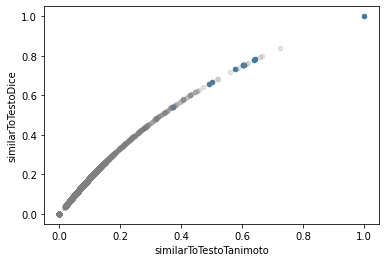

In [120]:
sortedByDice = sortedByDice.reset_index(drop=True)
testes_subset = sortedByDice[sortedByDice.name.str.contains('testosterone', case=False)]
testes_subset = testes_subset[['name', 'similarToTestoTanimoto', 'similarToTestoDice']]

fig, ax = plt.subplots()

testes_subset.set_index('name').plot.scatter(x='similarToTestoTanimoto', y='similarToTestoDice', ax=ax)
drugs.plot.scatter(x='similarToTestoTanimoto', y='similarToTestoDice', color='tab:grey', alpha=0.2, ax=ax)

Both metrices result in the same ranking.

## Exercise 3 Similarity Maps

Visually compare testosterone to progesterone using different types of fingerprints:
- Morgan
- APFingerprint
- TTFingerprint
- RDKFingerprint

Q: How do the results look with tanimoto? Do the results change with different metrics?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()